## TreeViz

Treeviz takes an sklearn decision tree to initalize. Standard dispaly is the same as tree.plot

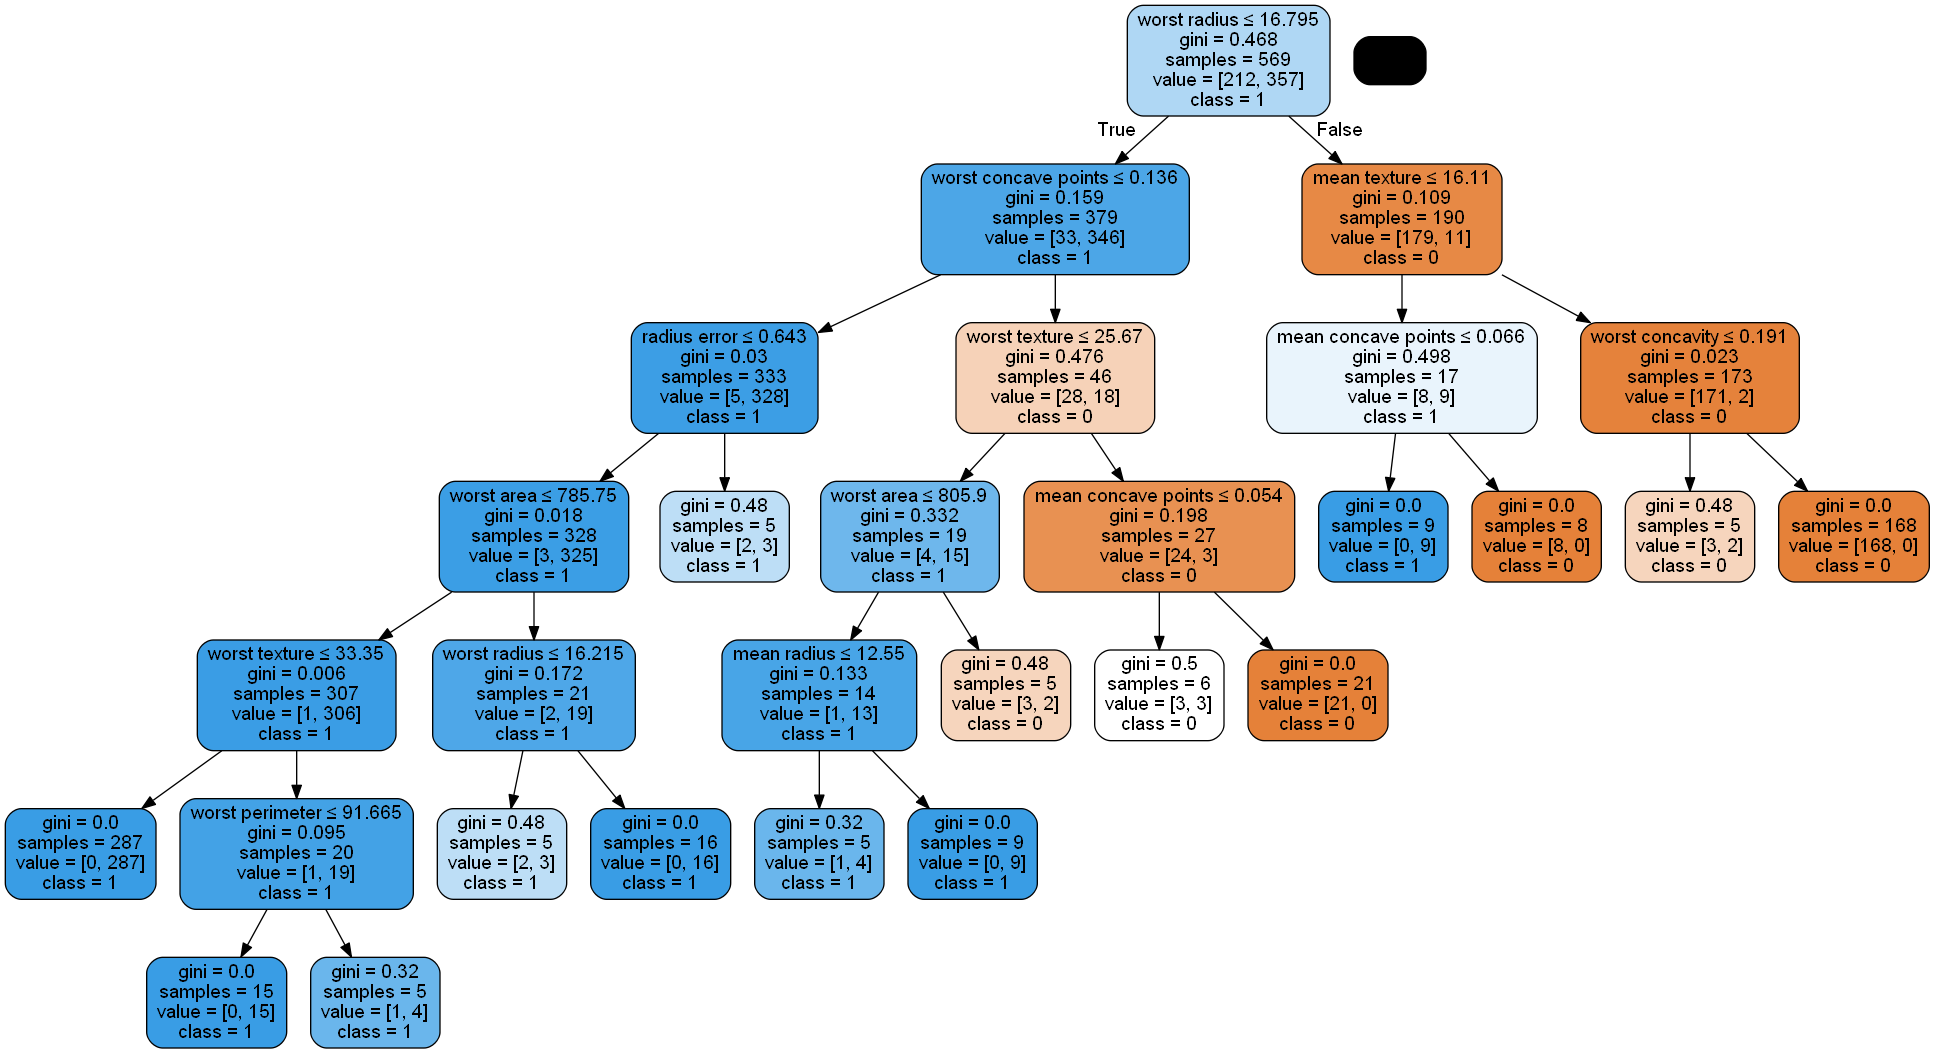

In [16]:
from sklearn.datasets import load_breast_cancer as load_data
from sklearn.tree import DecisionTreeClassifier

from treeviz import TreeViz, DisplayScheme

from IPython.display import Image


# Breast cancer dataset
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=5)
data = load_data()
clf.fit(data.data, data.target)

# TreeViz
tv = TreeViz(clf, feature_names=data.feature_names)

# Raw tree
orig_name = 'img/original_tree.png'
tv.write_png(orig_name)
Image(filename=orig_name) 

Pruning will end branches once only a single decision remains in the sub-tree.

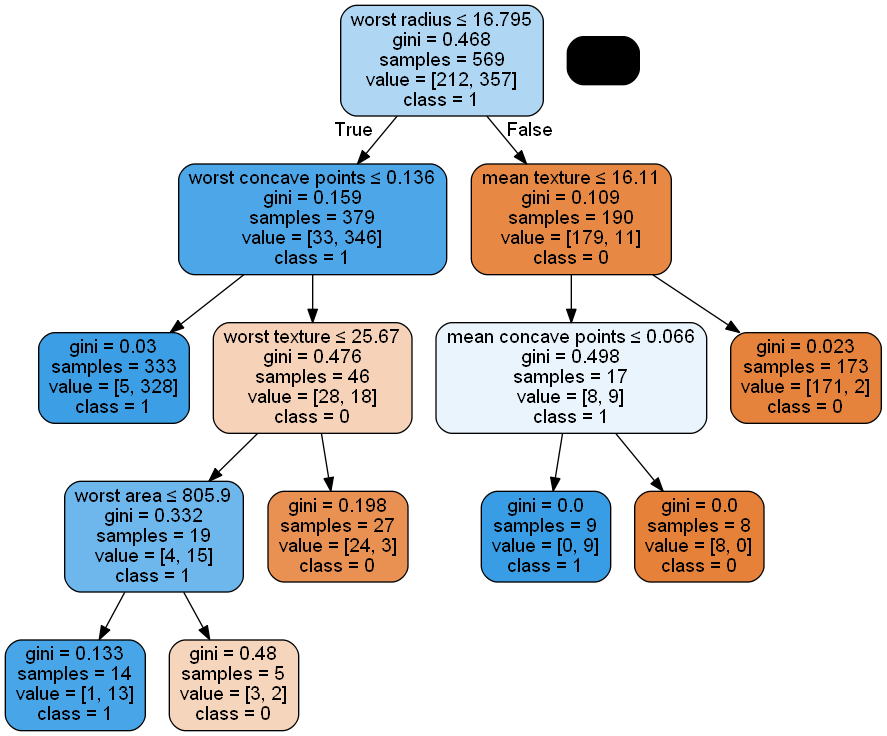

In [3]:
# Prune and write
pruned_name = 'img/pruned_tree.png'
tv.prune().write_png(pruned_name)
Image(filename=pruned_name) 

![title](img/pruned.png)

In [ ]:
Tracing will retain only the nodes used when deciding on the samples.

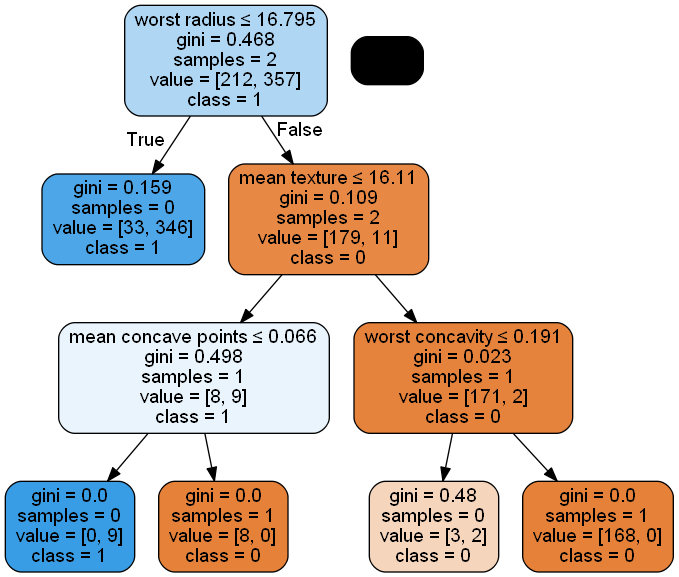

In [4]:
traced = tv.trace(data.data[0:2])
traced_file = 'img/traced_tree.png'
traced.write_png(traced_file)
Image(filename=traced_file)

## DisplayScheme

The standard display scheme is white to green and colors based on gini of split.

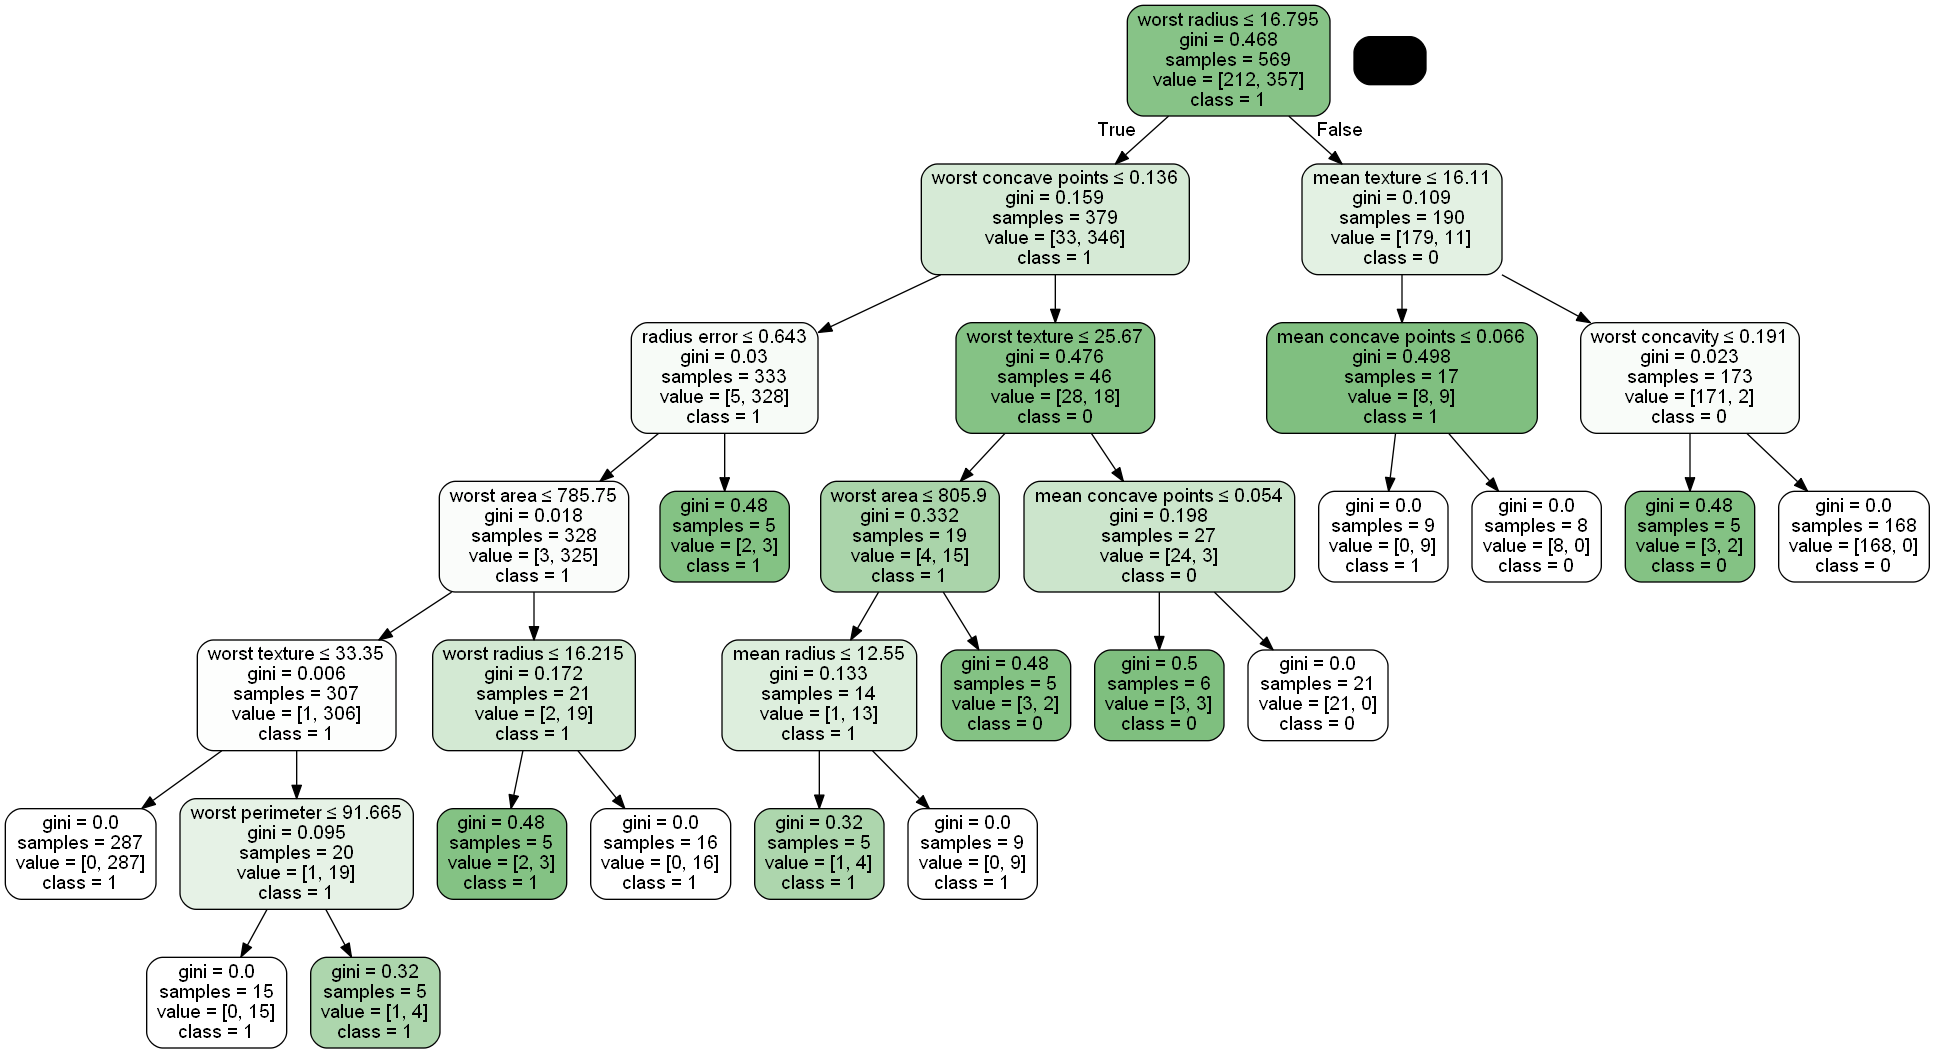

In [8]:
tv_disp = TreeViz(clf, feature_names=data.feature_names, display_scheme='standard')
disp_file = 'img/tree_std.png'
tv_disp.write_png(disp_file)
Image(filename=disp_file)

Change the metric to change how coloring is determined

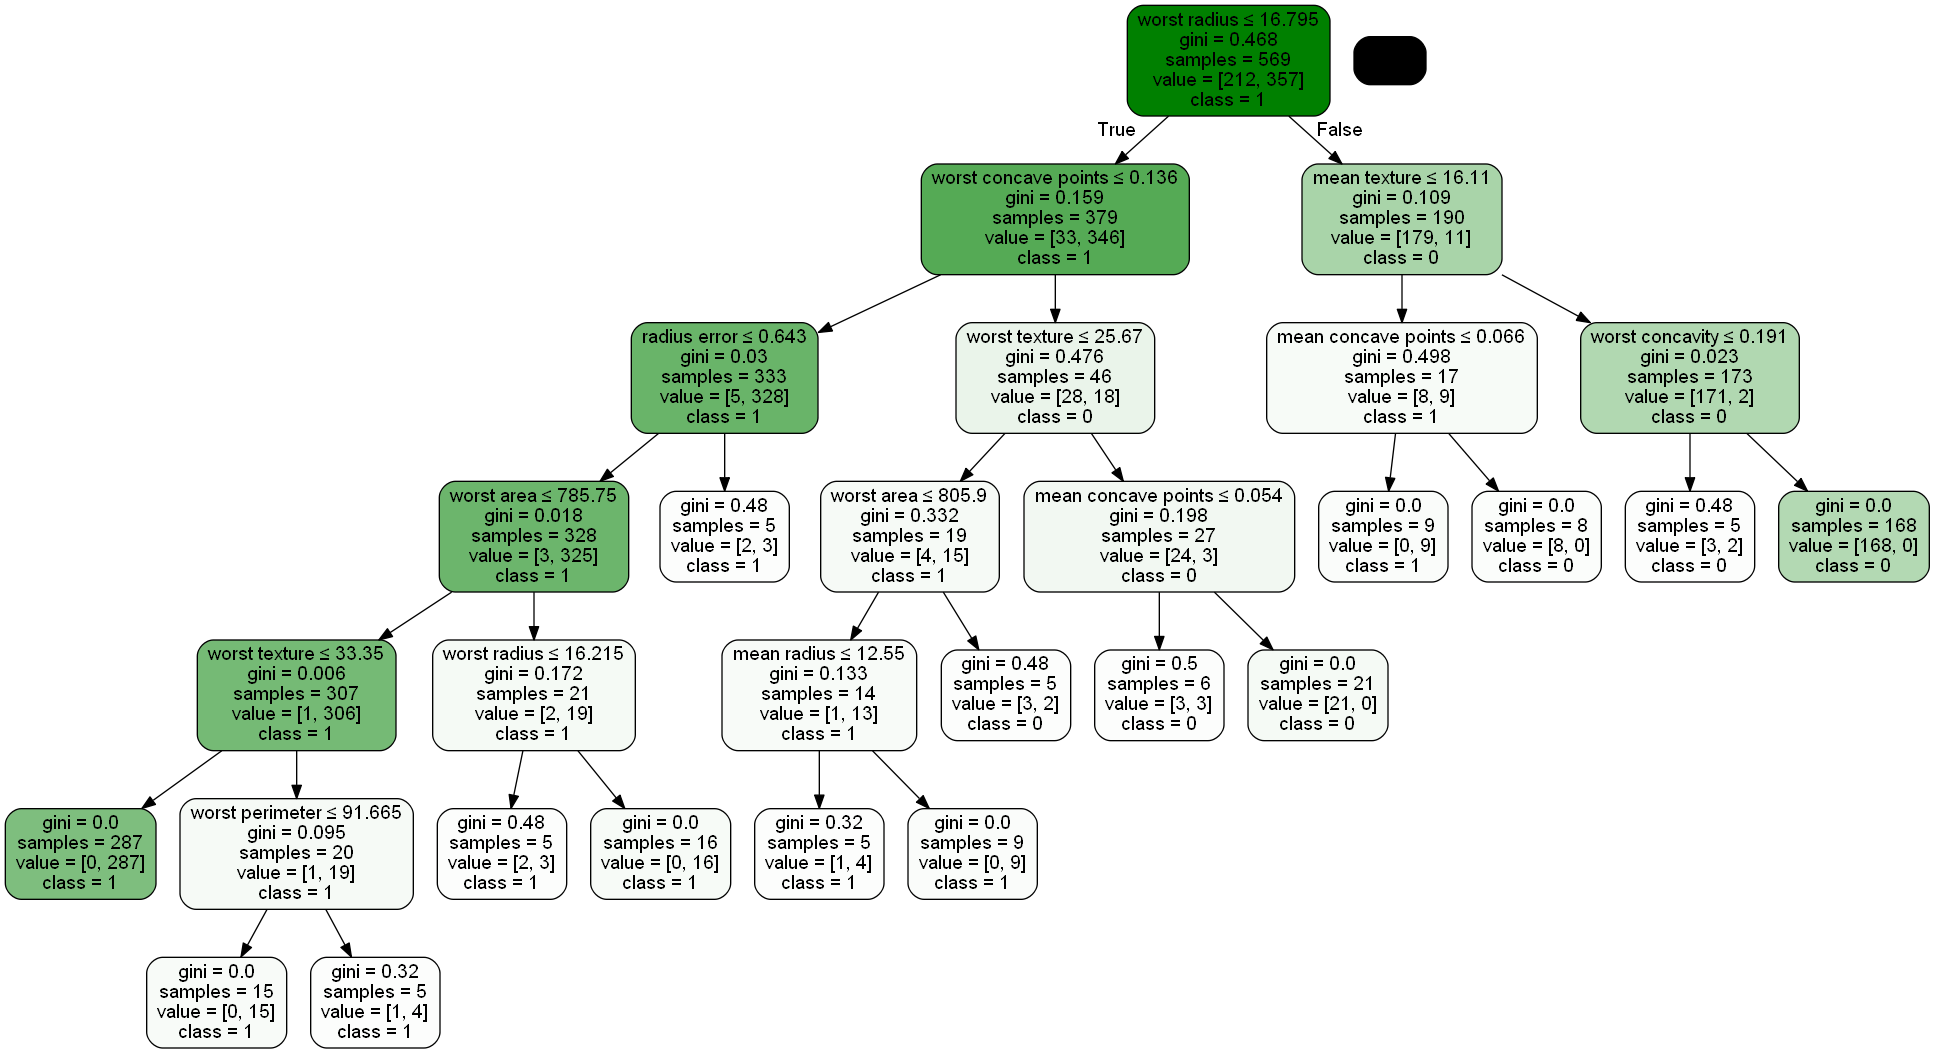

In [12]:
tv_disp.display_scheme.metric = 'sample_size'
disp_file = 'img/tree_std_sample_size.png'
tv_disp.write_png(disp_file)
Image(filename=disp_file)

TreeViz's can share the same display scheme

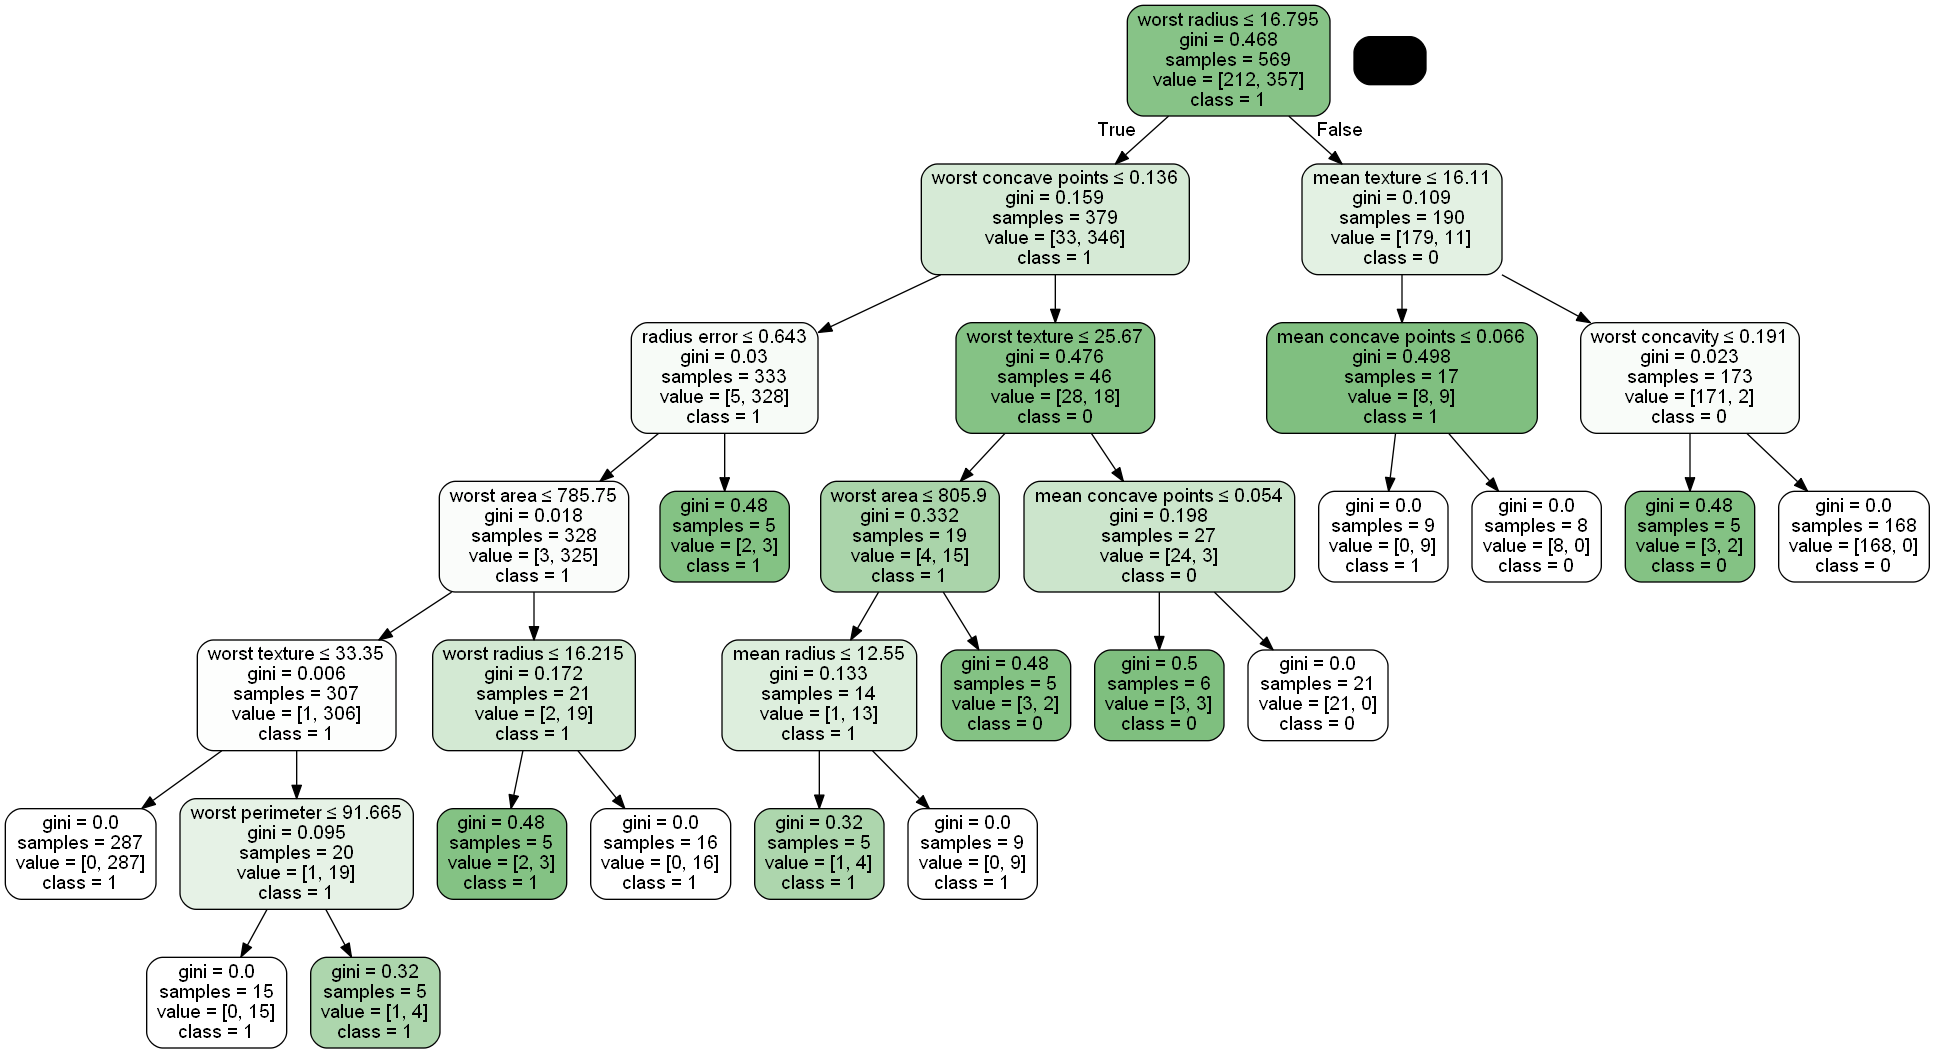

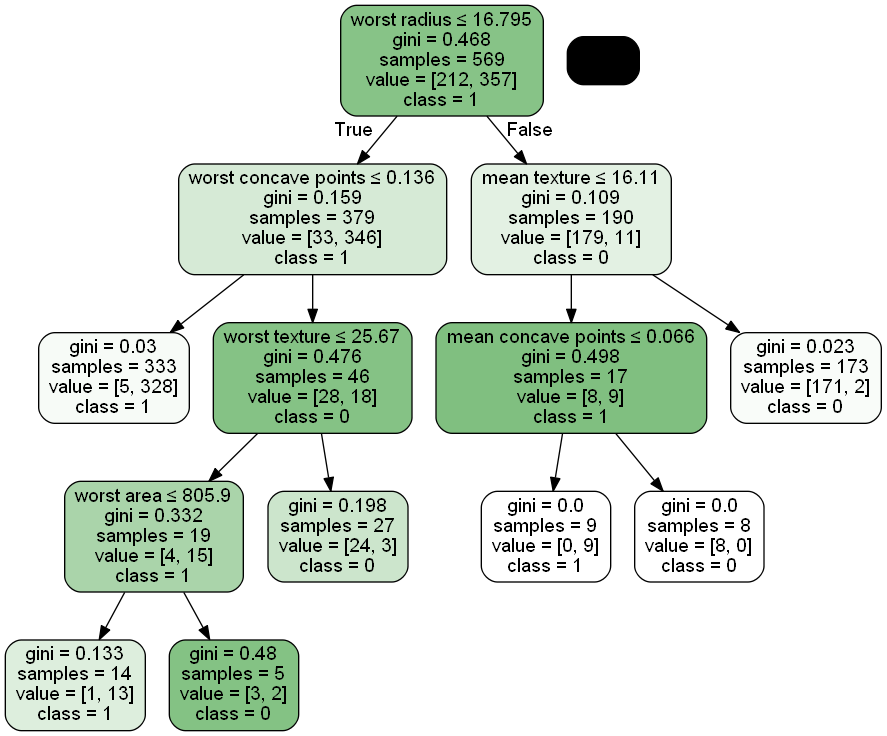

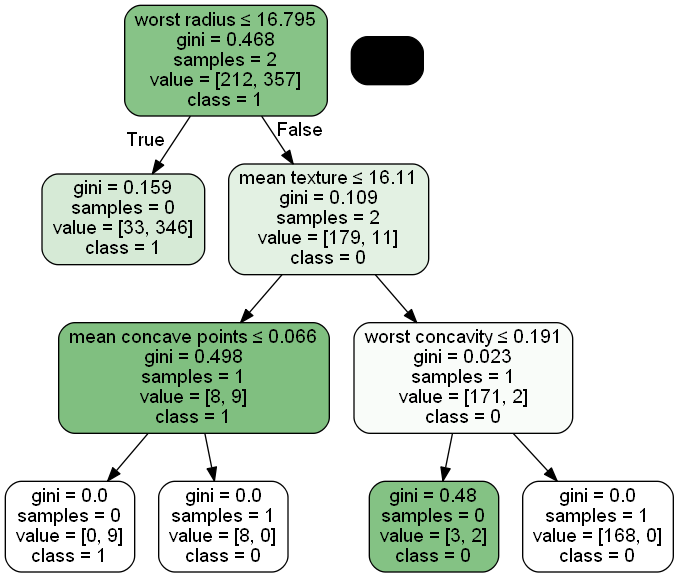

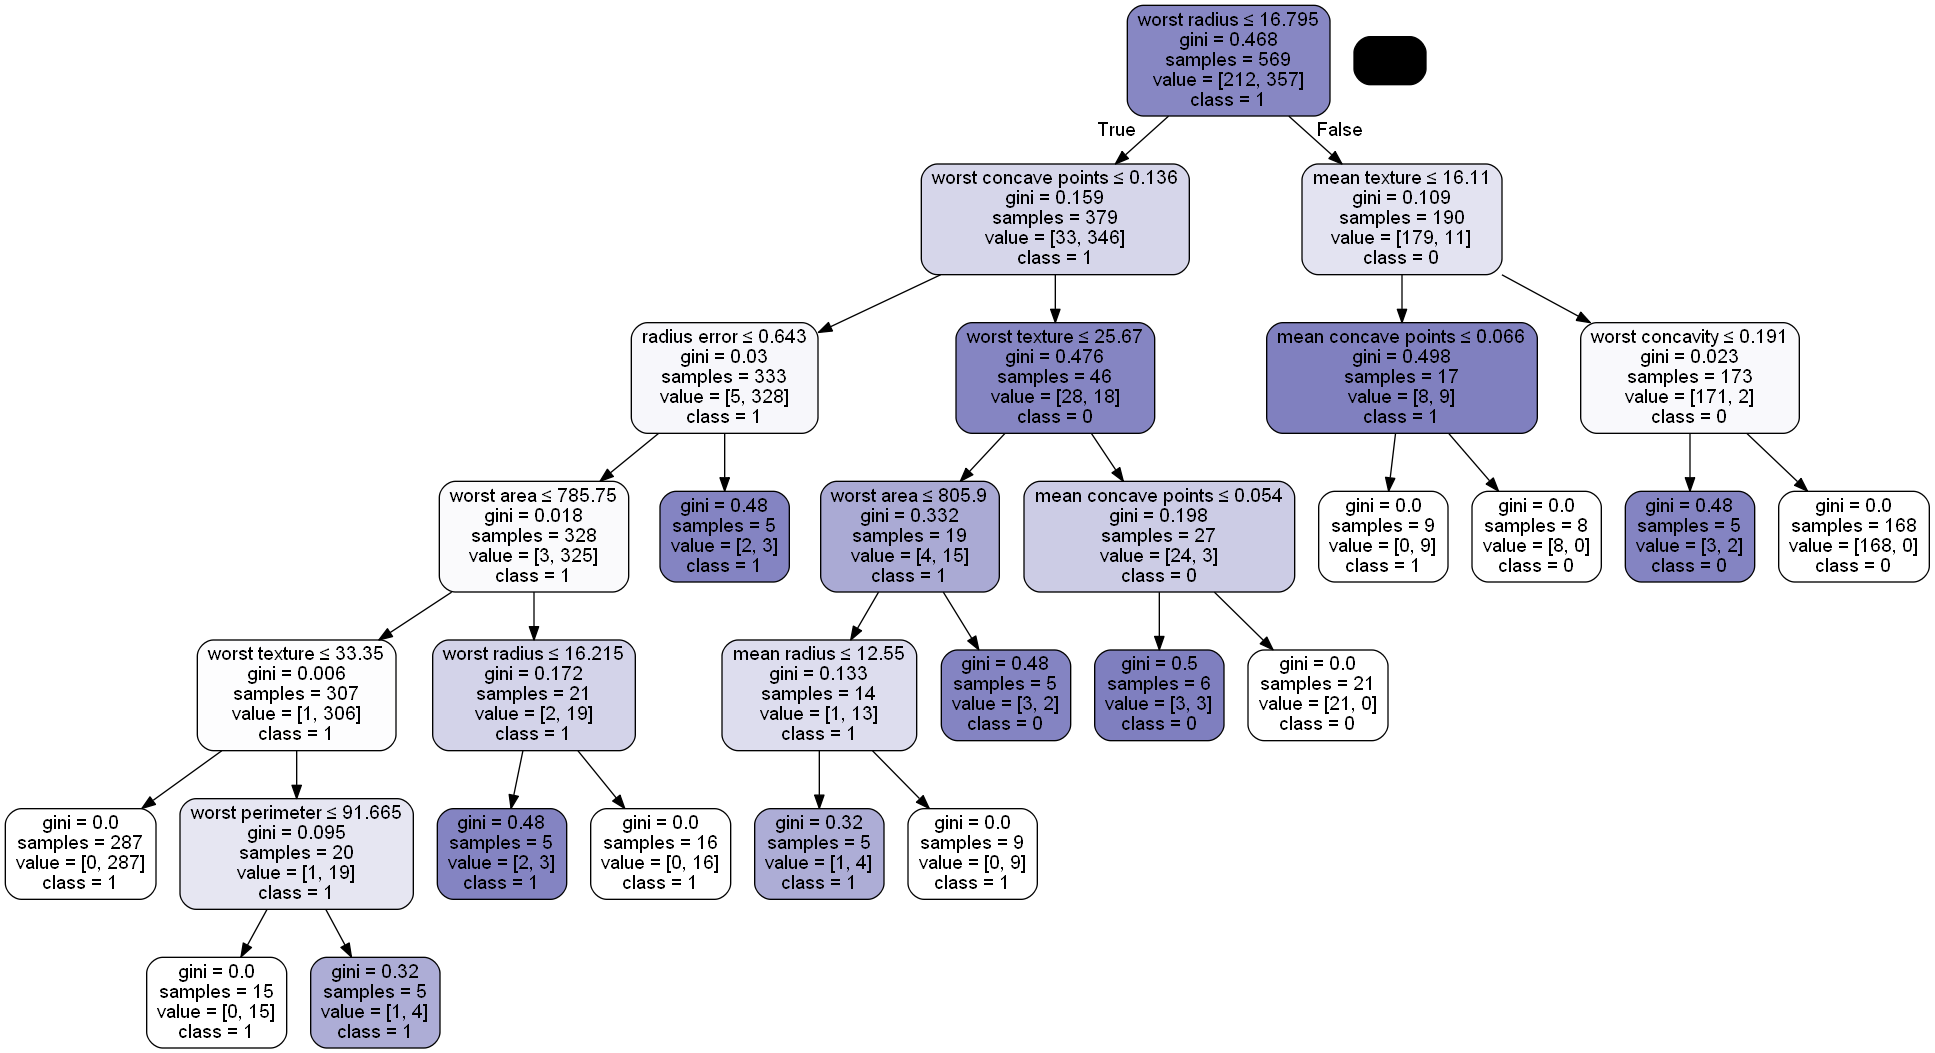

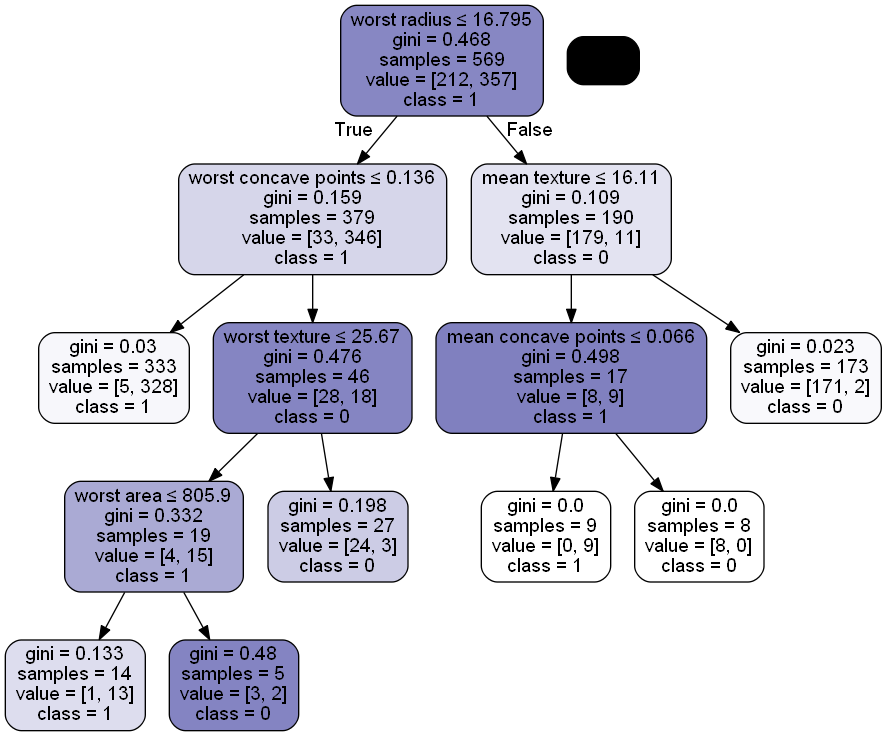

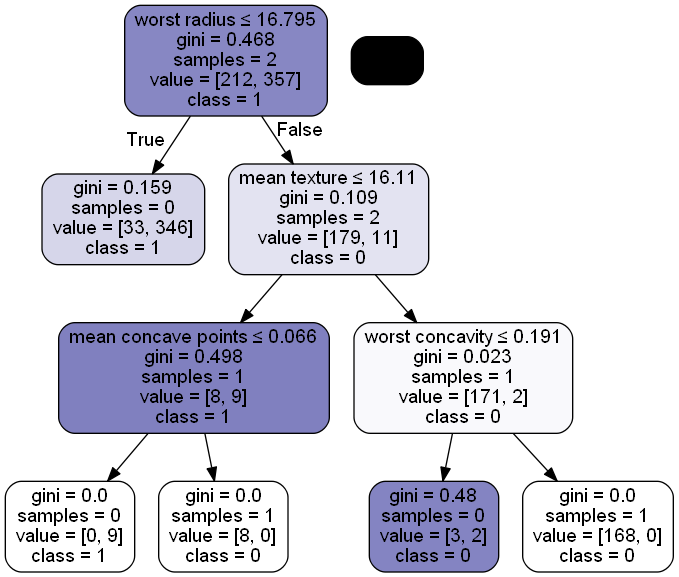

In [22]:
from treeviz import ColorBar

trees = [tv, tv.prune(), tv.trace(data.data[0:2])]
ds = DisplayScheme()
for t in trees:
    t.display_scheme = ds
    t.write_png('tempfile.png')
    display(Image('tempfile.png'))

ds.color_bar = ColorBar([255,255,255], [0,0,128])
for t in trees:
    t.write_png('tempfile.png')
    display(Image('tempfile.png'))